# Relatório Simulação 5 - Modelo SIR

#### Ana Clara Mueller Miranda, RA: 148806
#### Bruno Pires Moreira Silva, RA: 139892
#### Jonatas Carrocine, RA: 143472



##1. Introdução

O projeto 5 tem como objetivo desenvolver um modelo epidemiológico, onde apresenta uma população de tamanho fixo e que são categorizados da seguinte forma:


*   S - Suscetíveis
*   I - Infectados
*   R - Recuperados

Por isso esse modelado é chamado de modelo SIR.

Para cada variável, temos as seguintes EDOs:

$$
\dfrac {dS}{dt} = -rSI
$$

$$
\dfrac {dI}{dt} = rSI - aI
$$

$$
\dfrac {dR}{dt} = aI
$$

> Nas equações acima, "r" se trata da taxa de infecção, e "a" se trata da taxa de recuperação

Sendo assim, serão feitas algumas simulações para verificar como se comporta uma epidemia, e seus cenários.


##2. Desenvolvimento

###2.1 Código implementado

Abaixo temos o código implementado, temos na primeira parte o desenvolvimento da nossa classe SIR, que é declarado seus valores iniciais, e suas EDOs.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
class SIR:
    def __init__(self,r,S,I,a):
      self.edoS = [S]
      self.edoI = [I]
      self.edoR = [0]

      self.S = S
      self.I = I
      self.R = 0

      self.r = r
      self.a = a


    def dSdt(self):
      dS = (-self.r*self.S*self.I)
      #print('resultado EDO suscetiveis',dS)
      self.edoS.append(dS+self.S);
      return dS

    def dIdt(self):
      dI = (self.r*self.S - self.a)*self.I
      #print('resultado EDO Infectados',dI)
      self.edoI.append(dI+self.I)
      return dI

    def dRdt(self):
      dR = (self.a*self.I)
      #print('Resultado EDO Recuperados',dR)
      self.edoR.append(dR+self.R)
      return dR

    def Update(self,S,I,R):
      self.S += S
      self.I += I
      self.R += R
      

Na segunda parte do código, temos a simulação em si dos valores, onde a quantidade de indivíduos suscetíveis, infectados e recuperados vão ser atualizados conforme o tempo.

In [ ]:
def simulacao(r,S,I,a,time):
  values = SIR(r,S,I,a)
  t = [0]
  for i in np.arange(0,time):
    #print('Geracao: ',i)
    #print("Suscetíveis: ",int(simulacao.S),"\n Infectados: ",int(simulacao.I),"\nRecuperados: ",int(simulacao.R), "\nPopulação total: ", int(simulacao.S+simulacao.I+simulacao.R))
    values.Update(values.dSdt(),values.dIdt(),values.dRdt())
    #print('\n\n\n\n')
    t.append(i)
  plt.plot(t, values.edoS,color='yellow')
  plt.plot(t, values.edoI,color='red')
  plt.plot(t, values.edoR,color='blue')
  plt.legend(["Suscetíveis", "Infectados", "Recuperados"])
  plt.show()


##3. Resultados

###3.1 Teste em escala reduzida

Utilizando uma escala pequena, utilizando cerca de 200 indivíduos, temos uma taxa de trasmissão de 0.0009, e uma taxa de recuperação de 0.05, em um intervalo de 100 dias.

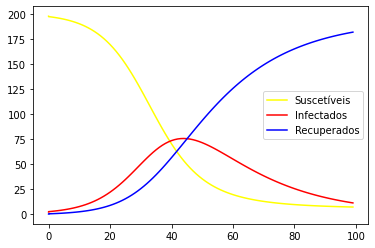

In [ ]:
simulacao(0.0009,198, 2,0.05,100)

Como podemos observar, a curva de Infectados atinge o seu ápice na faixa do dia 40, diminuindo lentamente a quantidade de indivíduos depois disso, pois a quantidade de pessoas Suscetíveis diminuiu significantemente.

Com isso, no fim da simulação, no dia 100, podemos ver que praticamente toda a população foi infectada.

####3.1.1 Escala reduzida, com uma taxa maior de infecção

Se aumentarmos a taxa de transmissão para 0.002, podemos notar um pico maior no intevalo de tempo menor, obtendo o seu ápice na faixa do dia 20, o que vai permitir que a quantidade de indivíduos estejam recuperado da infecção, mas resultaria em colapsos no sistema de saúde em um caso real, gerando óbitos que poderiam ser evitados.


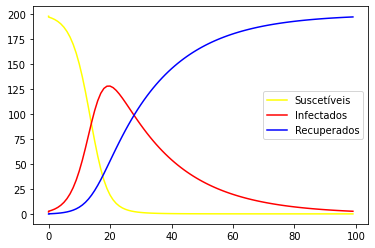

In [ ]:
simulacao(0.002,198, 2,0.05,100)

####3.1.2 Escala reduzida, com uma taxa menor de infecção

Se diminuirmos a taxa de transmissão para 0.0005, podemos notar um que a curva foi achatada, sendo assim necessário aumentar o intervalo de tempo para verificar o gráfico como um todo.

Com uma taxa menor de infecção, podemos observar que temos indivíduos que não foram infectados, sendo assim, a doença deixa de se propagar, e ela não conseguiu infectar toda a população.

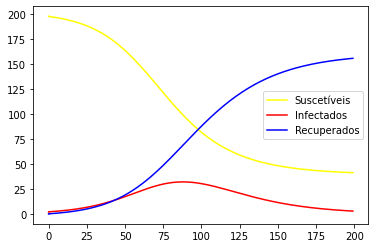

In [ ]:
simulacao(0.0005,198, 2,0.05,200)

###3.2 Simulações usando uma população do tamanho do Brasil



Considerando a infecção do tamanho da população do Brasil, de cerca de 213 milhões, e as seguintes taxas de infecção e recuperação, e o intervalo de tempo, obtemos o seguinte gráfico:

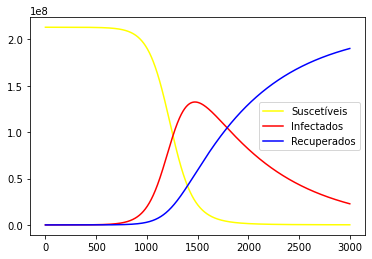

In [ ]:
simulacao(0.00000000005,212999998, 2000,0.0013,3000)

Como podemos observar, a partir do tempo 2000, não tem ninguém suscetível a doença, sendo assim, toda a população foi infectada, e o pico das infeccções ocorreram no tempo 1500, portanto, ocorreria um colapso no sistema de saúde.

####3.2.1 Taxa menor de transmissão

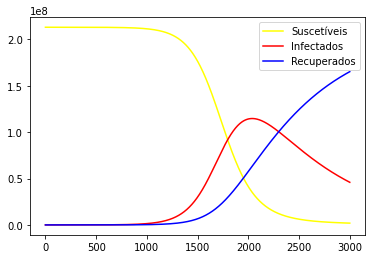

In [ ]:
simulacao(0.000000000037,212999998, 2000,0.0013,3000)

Se houver uma taxa menor de infecção, temos que o pico de infecções ocorre em 2000, e que não tem mais pessoas suscetíveis no tempo em 3000, o que nos mostra que foi possível atrasar o pico da doença.

####3.2.2 Taxa maior de cura

Considerando na situação em que a taxa recuperação seja 4 vezes maior que uma situação normal, após ser infectado, decorrente de uma aplicação maior de vacinas, ou reforçando as medidas preventivas.

Temos assim o seguinte gráfico, evidenciando o achatamento da curva:

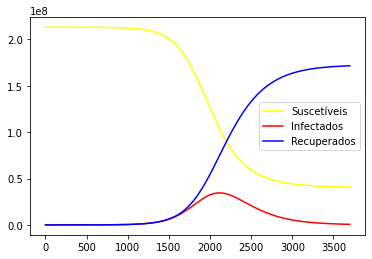

In [ ]:
simulacao(0.00000000005,212999998, 2000,0.0052,3700)

Como podemos verificar, neste caso temos ainda indivíduos que não foram infectados, portanto, podemos ver que a doença conseguiu ser controlada.